# ML for NLP

We will use the News Aggregator Dataset provided by Fabio Gasparetti. Download and unpack it. Create a `data` folder and place the unpacked files there.

# Data Preprocessing

In [22]:
import pandas as pd
import numpy as np

In [2]:
filename = "./data/newsCorpora.csv"
names = ["id", "title", "url", "publisher", "category", "story", "hostname", "timestamp"]
df = pd.read_csv(filename, sep='\t', names=names)

In [7]:
publishers = ["Reuters", "Huffington Post", "Businessweek", "Contactmusic.com", "Daily Mail"]
fdf = df[df.publisher.isin(publishers)]

In [8]:
# Shuffle: https://stackoverflow.com/questions/29576430/shuffle-dataframe-rows
from sklearn.utils import shuffle

sdf = shuffle(fdf)
ratio_1 = int(len(sdf) / 10 * 8)
ratio_2 = int(len(sdf) / 10 * 9)

In [9]:
training = sdf[:ratio_1]
validation = sdf[ratio_1:ratio_2]
test = sdf[ratio_2:]
print("{} : {} : {}".format(len(training), len(validation), len(test)))
print("{} : {} : {}".format(len(training) / len(sdf), len(validation) / len(sdf), len(test) / len(sdf)))

10672 : 1334 : 1334
0.8 : 0.1 : 0.1


In [10]:
tr_filename = "./data/train.txt"
va_filename = "./data/valid.txt"
te_filename = "./data/test.txt"

training.to_csv(tr_filename, sep="\t", header=False, index=False)
validation.to_csv(va_filename, sep="\t", header=False, index=False)
test.to_csv(te_filename, sep="\t", header=False, index=False)

# Feature Extraction

* https://scikit-learn.org/stable/modules/feature_extraction.html

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [29]:
tr = vectorizer.fit_transform(training.title)
va = vectorizer.transform(validation.title)
te = vectorizer.transform(test.title)

# Training and Prediction

* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [34]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(tr, training.category)

In [39]:
tr_pred = clf.predict(tr)
va_pred = clf.predict(va)
te_pred = clf.predict(te)

# Accuracy
* https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

In [40]:
from sklearn.metrics import accuracy_score

In [44]:
training_accuracy = accuracy_score(training.category, tr_pred)
validation_accuracy = accuracy_score(validation.category, va_pred)
test_accuracy = accuracy_score(test.category, te_pred)

In [46]:
"{:.2f}, {:.2f}, {:.2f}".format(training_accuracy, validation_accuracy, test_accuracy)

'1.00, 0.91, 0.92'

# Confusion Matrix
* https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

In [47]:
from sklearn.metrics import plot_confusion_matrix

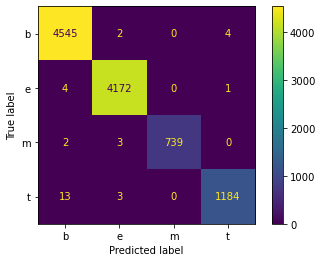

In [49]:
plot_confusion_matrix(clf, tr, training.category) 

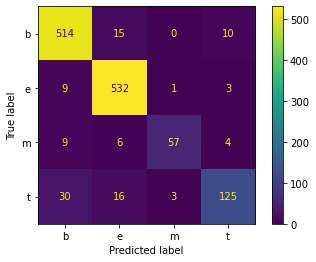

In [48]:
plot_confusion_matrix(clf, te, test.category) 

In [ ]:
# Precision, Recall, and F1 Score